In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(313)

In [2]:
n_samples = 1000
n_features = 2

# KMeans hyperparameters
k = 3  # Number of centroids to choose
max_iter = 10  # Maximum number of iterations for the KMeans algorithm

In [3]:
data = np.random.randn(n_samples, n_features)
data.shape

(1000, 2)

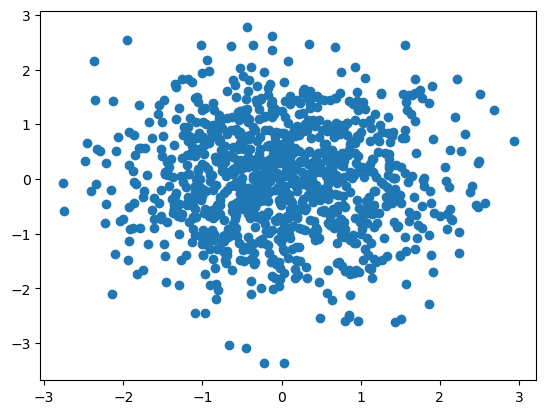

In [4]:
plt.scatter(data[:, 0], data[:, 1])

In [5]:
k_initial_indices = np.random.choice(n_samples, k, replace=False)
centroids = data[k_initial_indices]
centroids

array([[ 1.57058266,  1.40829337],
       [ 0.09252148, -0.34217733],
       [ 0.16306176,  0.79004166]])

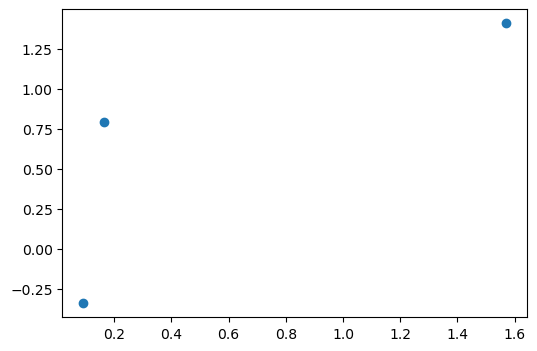

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(centroids[:, 0], centroids[:, 1])

In [7]:
for i in range(max_iter):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1)
    labels = np.argmin(distances, axis=-1)

    new_centroids = np.array([data[labels == label].mean(axis=0) for label in range(k)])

    # Check if the centroids have converged (i.e., no significant change between iterations)
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

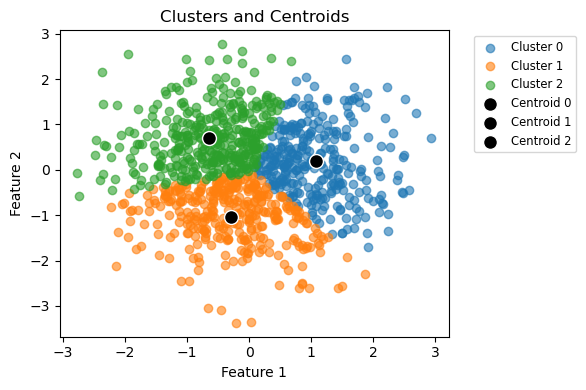

In [10]:
plt.figure(figsize=(6, 4))

# Plot data points with their cluster labels
for cluster_id in range(k):
    cluster_points = data[labels == cluster_id]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {cluster_id}",
        alpha=0.6,
    )

# Plot centroids with distinct colors
for cluster_id, centroid in enumerate(new_centroids):
    plt.scatter(
        centroid[0],
        centroid[1],
        color="black",
        edgecolor="white",
        s=100,
        label=f"Centroid {cluster_id}",
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.title("Clusters and Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()